In [1]:
import os
os.chdir("C:\\Users\\hites\\Documents\\Python_final_Project")

In [2]:
!pip install geopandas


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set_palette("Set2")
sns.set_style("ticks")

In [6]:
import datetime
import sqlite3
from sqlite3 import Error
from datetime import date, datetime
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn



In [7]:

def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name:
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)


In [8]:
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows


In [9]:
City_crime_Data= pd.read_csv('Part_1_Crime_Data_.csv')
City_crime_Data.info()

C:\Users\hites\AppData\Local\Temp\ipykernel_19292\3065334078.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  City_crime_Data= pd.read_csv('Part_1_Crime_Data_.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545965 entries, 0 to 545964
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                545065 non-null  float64
 1   Y                545065 non-null  float64
 2   RowID            545965 non-null  int64  
 3   CrimeDateTime    545965 non-null  object 
 4   CrimeCode        545965 non-null  object 
 5   Location         543309 non-null  object 
 6   Description      545965 non-null  object 
 7   Inside_Outside   471352 non-null  object 
 8   Weapon           120728 non-null  object 
 9   Post             544180 non-null  object 
 10  Gender           457262 non-null  object 
 11  Age              435799 non-null  float64
 12  Race             536984 non-null  object 
 13  Ethnicity        18440 non-null   object 
 14  District         544180 non-null  object 
 15  Neighborhood     544147 non-null  object 
 16  Latitude         545065 non-null  floa

NORMALIZING DATA

In [10]:
def normalized_db(filename,normalizeddb):
    with open (filename,'r') as file:
        Data=file.read().split('\n')
        crime_list=[]
        for l in Data:
            crime_list.append(l)
            
# Location Table            
    Latitude=[]
    Longitude=[]
    Location=[]
    District=[]
    Neighborhood=[]
    location_t=[]
    for i in range(1,len(crime_list)):
        if len(crime_list[i].split(","))!=24:
            continue
        else:    
            Latitude.append(crime_list[i].split(",")[0])
            Longitude.append(crime_list[i].split(",")[1])
            Location.append(crime_list[i].split(",")[5])
            District.append(crime_list[i].split(",")[14])
            Neighborhood.append(crime_list[i].split(",")[15])
    for i in range(len(Latitude)):
        location_t.append((i+1,Latitude[i],Longitude[i],Location[i],District[i],Neighborhood[i]))
    
    loc_table="""CREATE TABLE Location (
        LocationID INTEGER NOT NULL PRIMARY KEY,
        Latitude DECIMAL NOT NULL,
        Longitude DECIMAL NOT NULL,
        Location TEXT NOT NULL,
        District TEXT NOT NULL,
        Neighborhood NOT NULL
    );"""
    c=create_connection(normalizeddb,False)
    create_table(c,loc_table)
    def insert_loc(c1,val):
        sql='''INSERT INTO Location(LocationID,Latitude,Longitude,Location,District,Neighborhood)
                VALUES(?,?,?,?,?,?)'''
        cur=c1.cursor()
        cur.execute(sql,val)
        return cur.lastrowid
    with c:
        for i,j,k,l,m,n in location_t:
            insert_loc(c,(i,j,k,l,m,n))
            
                
# Crime Table           
    crimecode=[]
    crimedate=[]
    crimetime=[]
    weapon=[]
    CrimeDescription=[]
    crime_t=[]
    for i in range(1,len(crime_list)):
        if len(crime_list[i].split(","))!=24:
            continue
        else:    
            crimecode.append(crime_list[i].split(",")[4])
            crimedate.append(crime_list[i].split(",")[3].split(' ',1)[0])
            crimetime.append(crime_list[i].split(",")[3].split(' ',1)[1].split(":",1)[0])
            weapon.append(crime_list[i].split(",")[8])
            CrimeDescription.append(crime_list[i].split(",")[6])
            
            
    for i in range(len(crimecode)):
        crime_t.append((i+1,datetime.strptime(crimedate[i], '%Y/%m/%d').strftime('%Y-%m-%d'),int(crimetime[i]),crimecode[i],weapon[i],CrimeDescription[i]))    
    crime_table="""CREATE TABLE Crime(
        CrimeID INTEGER NOT NULL PRIMARY KEY,
        CrimeDate DATE NOT NULL,
        CrimeTime INTEGER NOT NULL,
        CrimeCode TEXT NOT NULL,
        Weapon TEXT NOT NULL,
        CrimeDescription TEXT NOT NULL
        
    );"""
    c=create_connection(normalizeddb,False)
    create_table(c,crime_table)
    def insert_crime(c1,val):
        sql='''INSERT INTO Crime(CrimeID,CrimeDate,CrimeTime,CrimeCode,Weapon,CrimeDescription)
                VALUES(?,?,?,?,?,?)'''
        cur=c1.cursor()
        cur.execute(sql,val)
        return cur.lastrowid
    with c:
        for i,j,k,l,m,n in crime_t:
            insert_crime(c,(i,j,k,l,m,n))


#Person Table
    Gender=[]
    Age=[]
    Race=[]
    Ethnicity=[]
    person_t=[]
    
    re={"Male":"M","Female":"F"}
    for i in range(1,len(crime_list)):
        if len(crime_list[i].split(","))!=24:
            continue
        else:    
            Gender.append(crime_list[i].split(",")[10])
            Age.append(crime_list[i].split(",")[11])
            Race.append(crime_list[i].split(",")[12])
            Ethnicity.append(crime_list[i].split(",")[13])
            
    for i in range(len(Gender)):
        if i in ("Male","Female"):
            Gender[i]=re[Gender[i]]

    
    
    for i in range(len(Gender)):
        person_t.append((i+1,Gender[i],Age[i],Race[i],Ethnicity[i],i+1,i+1))    
    person_table="""CREATE TABLE Person(
        PersonID INTEGER NOT NULL PRIMARY KEY,
        Gender TEXT NOT NULL,
        Age INTEGER NOT NULL,
        Race TEXT NOT NULL,
        Ethnicity TEXT NOT NULL,
        CrimeID INTEGER NOT NULL,
        LocationID INTEGER NOT NULL,
        FOREIGN KEY (CrimeID) REFERENCES Crime (CrimeID),
        FOREIGN KEY (LocationID) REFERENCES Location (LocationID)
    );"""
    c=create_connection(normalizeddb,False)
    create_table(c,person_table)
    def insert_person(c1,val):
        sql='''INSERT INTO Person(PersonID,Gender,Age,Race,Ethnicity,CrimeID,LocationID)
                VALUES(?,?,?,?,?,?,?)'''
        cur=c1.cursor()
        cur.execute(sql,val)
        return cur.lastrowid
    with c:
        for i,j,k,l,m,n,o in person_t:
            insert_person(c,(i,j,k,l,m,n,o))
            
         

In [ ]:

normalized_db('Part_1_Crime_Data_.csv','Normalized_data.db')

In [28]:
def weekday(conn):
    Sql_statement='''SELECT
  case cast (strftime('%w', CrimeDate) as integer)
  when 0 then 'Sunday'
  when 1 then 'Monday'
  when 2 then 'Tuesday'
  when 3 then 'Wednesday'
  when 4 then 'Thursday'
  when 5 then 'Friday'
  else 'Saturday' end as weekday
    FROM Crime
    
    '''
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [29]:
df=weekday(create_connection('Normalized_data.db', delete_db=False))

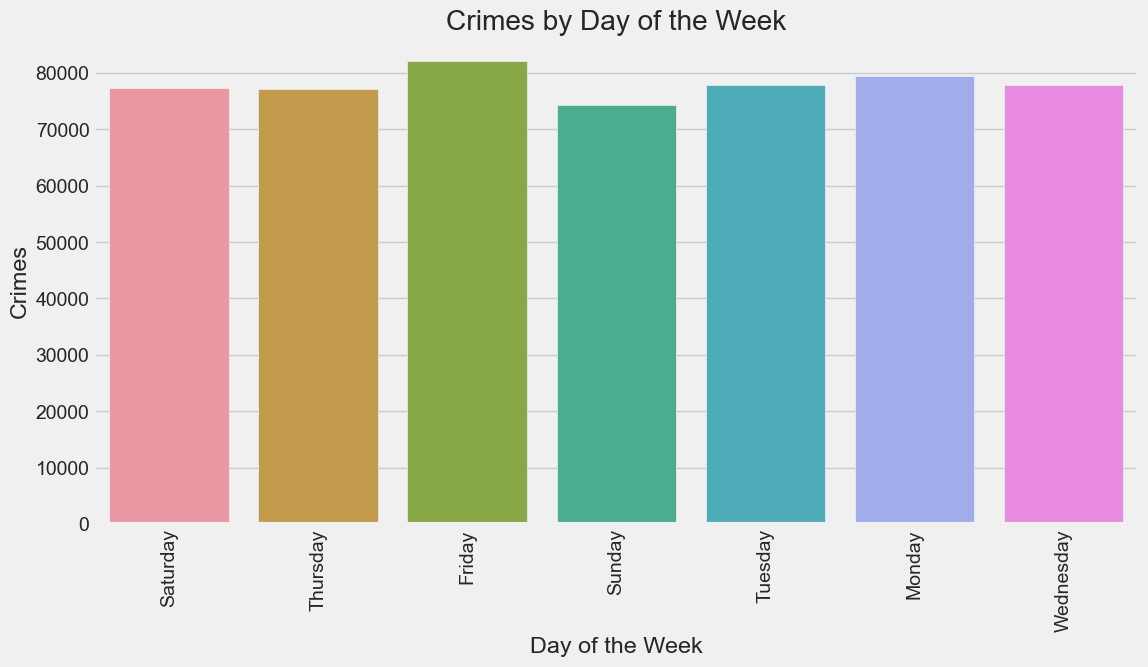

In [30]:

plt.figure(figsize=(12,6))
sns.countplot(x="weekday", data=df)
plt.title("Crimes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

In [31]:
def month(conn):
    Sql_statement='''SELECT
    COUNT(CrimeID) as crimes,
    cast (strftime('%m', CrimeDate) as integer) as month
    FROM Crime
    GROUP BY month
    ORDER BY crimes
    '''
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [32]:
mn=month(create_connection('Normalized_data.db', delete_db=False))

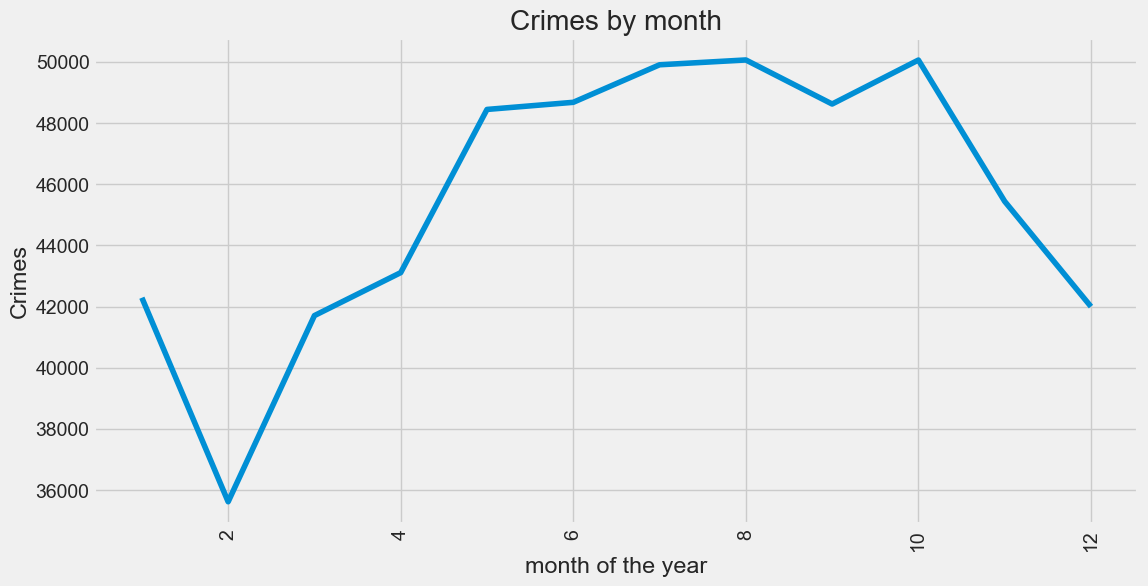

In [33]:

plt.figure(figsize=(12,6))
sns.lineplot(y="crimes",x="month", data=mn)
plt.title("Crimes by month")
plt.xlabel("month of the year")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

# Most crimes in day

In [34]:
def crimes_per_day(conn):
    Sql_statement='''SELECT
    Count(CrimeID) as crimes,CrimeDate
    FROM Crime
    GROUP BY CrimeDate
    ORDER BY crimes DESC
    '''
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [35]:
crimes_per_day(create_connection('Normalized_data.db', delete_db=False))

,crimes,CrimeDate
0,421,2015-04-27
1,254,2016-06-05
2,213,2018-12-20
3,205,2017-01-20
4,200,2017-10-25
...,...,...
4481,1,1963-10-30
4482,1,1922-06-22
4483,1,1920-06-18
4484,1,1220-04-07


In [36]:
def time(conn):
    Sql_statement='''SELECT
    Count(CrimeID) as crimes,CrimeTime as time
    FROM Crime
    GROUP BY CrimeTime
    ORDER BY crimes DESC
    '''
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [37]:
tm=time(create_connection('Normalized_data.db', delete_db=False))

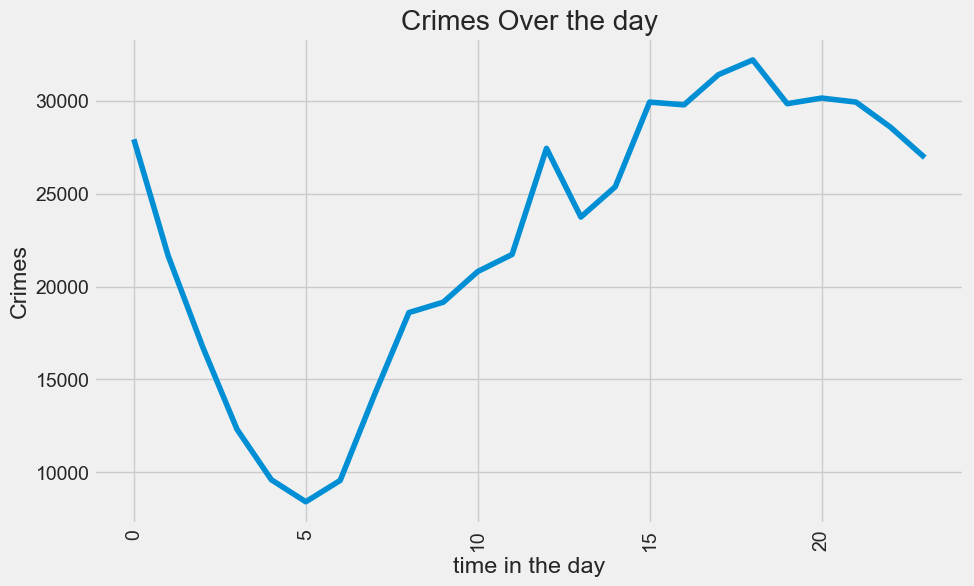

In [38]:

plt.figure(figsize=(10,6))
sns.lineplot(y="crimes",x="time", data=tm)
plt.title("Crimes Over the day")
plt.xlabel("time in the day")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

In [39]:
def years(conn):
    Sql_statement='''SELECT
    Count(CrimeID) as crimes,strftime('%Y', CrimeDate) as year
    FROM Crime
    GROUP BY year
    ORDER BY year DESC
    limit 12
    '''
    ### END SOLUTION
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [40]:
ye=years(create_connection('Normalized_data.db', delete_db=False))

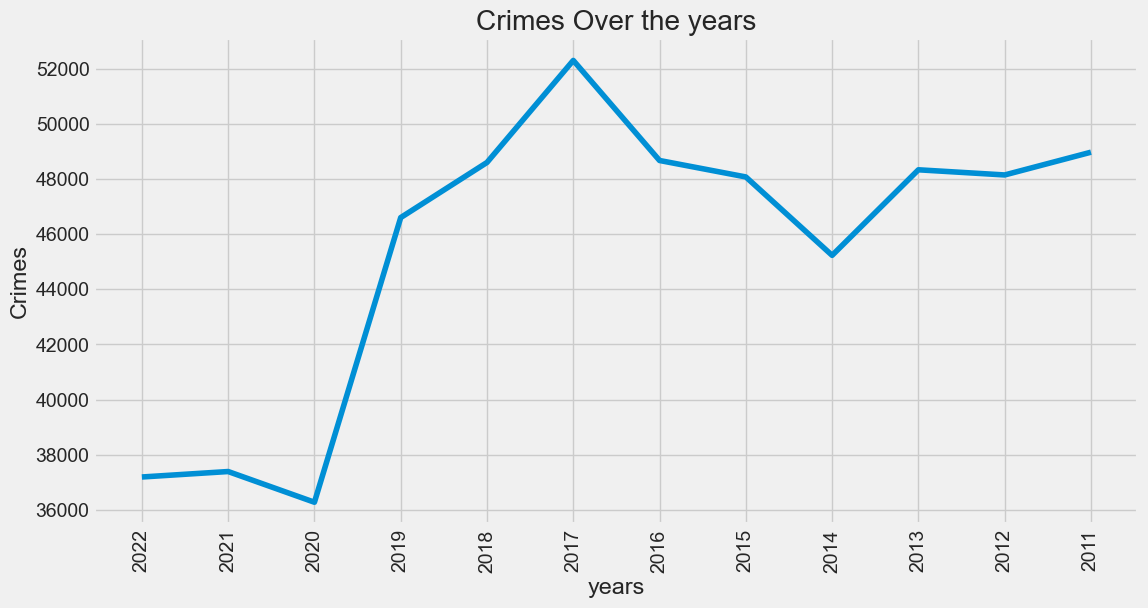

In [41]:

plt.figure(figsize=(12,6))
sns.lineplot(y="crimes",x="year", data=ye)
plt.title("Crimes Over the years")
plt.xlabel("years")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

In [42]:
def Gender(conn):
    Sql_statement='''SELECT
    Count(PersonID) as VICTIMS, Gender
    FROM Person
    WHERE Gender in ('F','M','U') 
    GROUP BY Gender
    
    '''
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [43]:
gn=Gender(create_connection('Normalized_data.db', delete_db=False))

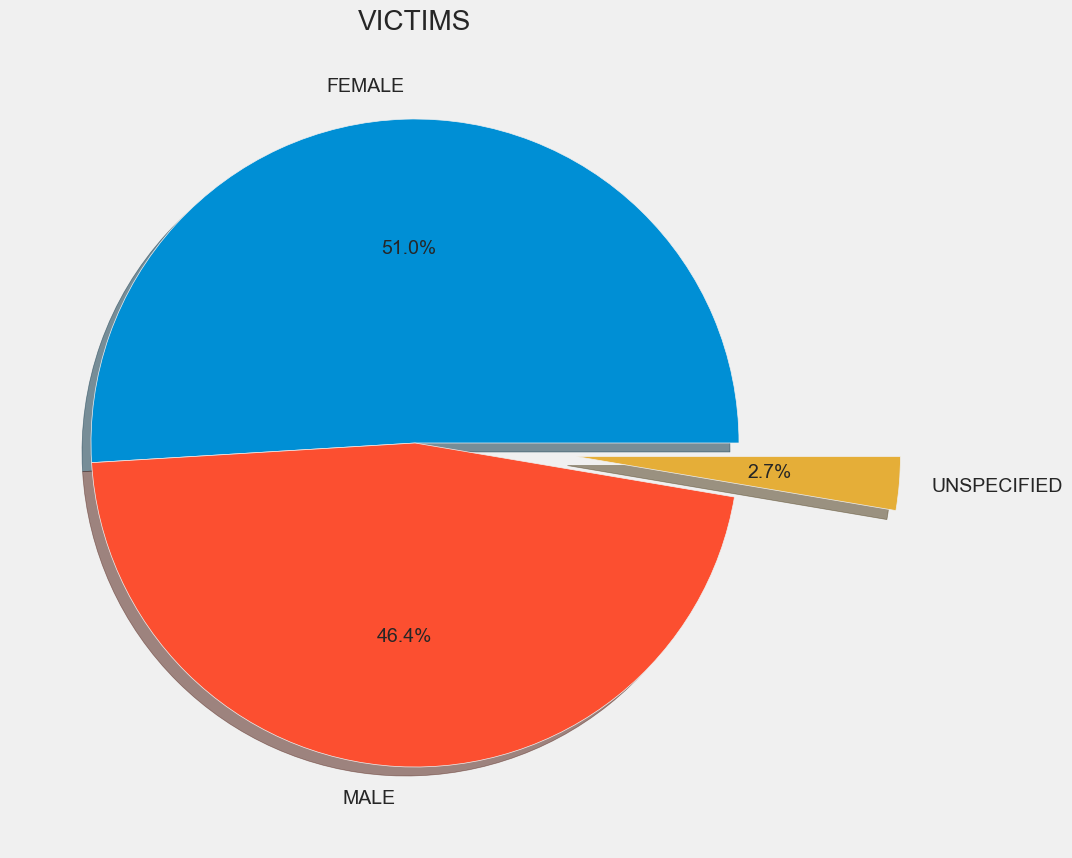

In [45]:
import matplotlib.pyplot as plt
labels=["FEMALE","MALE","UNSPECIFIED"]
plt.title("VICTIMS")
plt.pie(gn['VICTIMS'],explode=(0,0,0.5), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)

plt.show()

In [46]:
def Weapons(conn):
    Sql_statement='''SELECT
    Weapon,Count(crimeID) as crimes
    FROM Crime
    WHERE Weapon NOT IN ('','NA') 
    GROUP BY Weapon
    ORDER BY Crimes desc
    '''
    
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [47]:
wn=Weapons(create_connection('Normalized_data.db', delete_db=False))

In [48]:
wn

,Weapon,crimes
0,FIREARM,47514
1,OTHER,30940
2,KNIFE,18958
3,PERSONAL_WEAPONS,9464
4,HANDS,7113
5,FIRE,2340
6,HANDGUN,1693
7,KNIFE_CUTTING_INSTRUMENT,1113
8,BLUNT_OBJECT,766
9,UNKNOWN,345


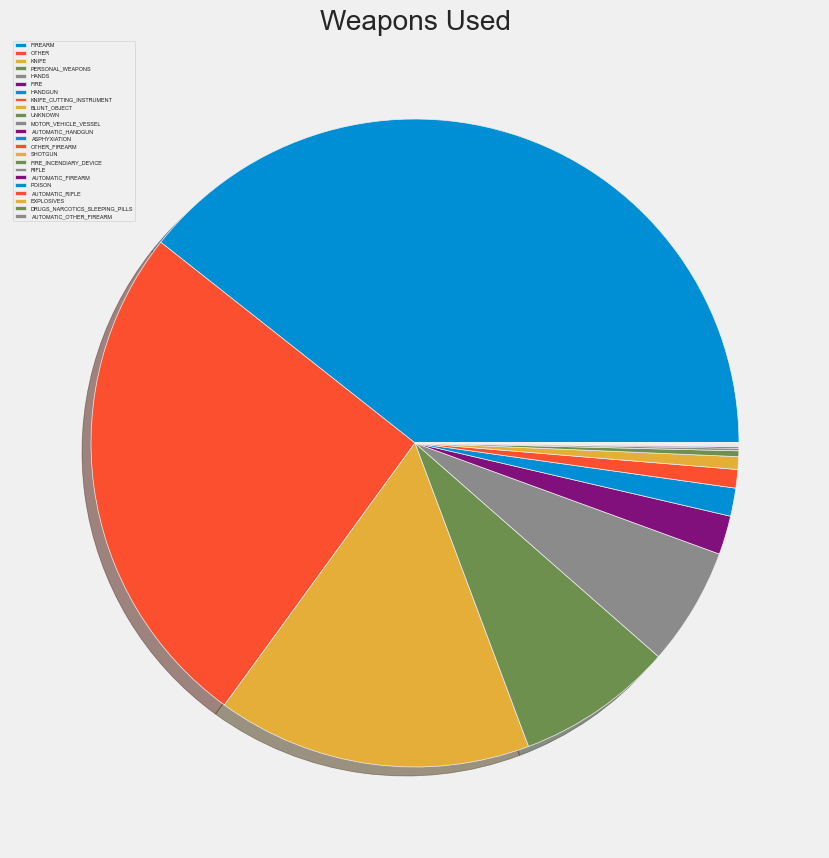

In [49]:
plt.title("Weapons Used")
plt.pie(wn['crimes'],shadow=True, startangle=0,textprops={'fontsize': 10})
plt.legend(labels=wn['Weapon'],loc='upper left', prop={'size': 4})
plt.show()

In [50]:
def topcrimes(conn):
    
    Sql_statement='''SELECT  CrimeDescription FROM Crime '''
    df = pd.read_sql_query(Sql_statement, conn)
    return df
    

In [51]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


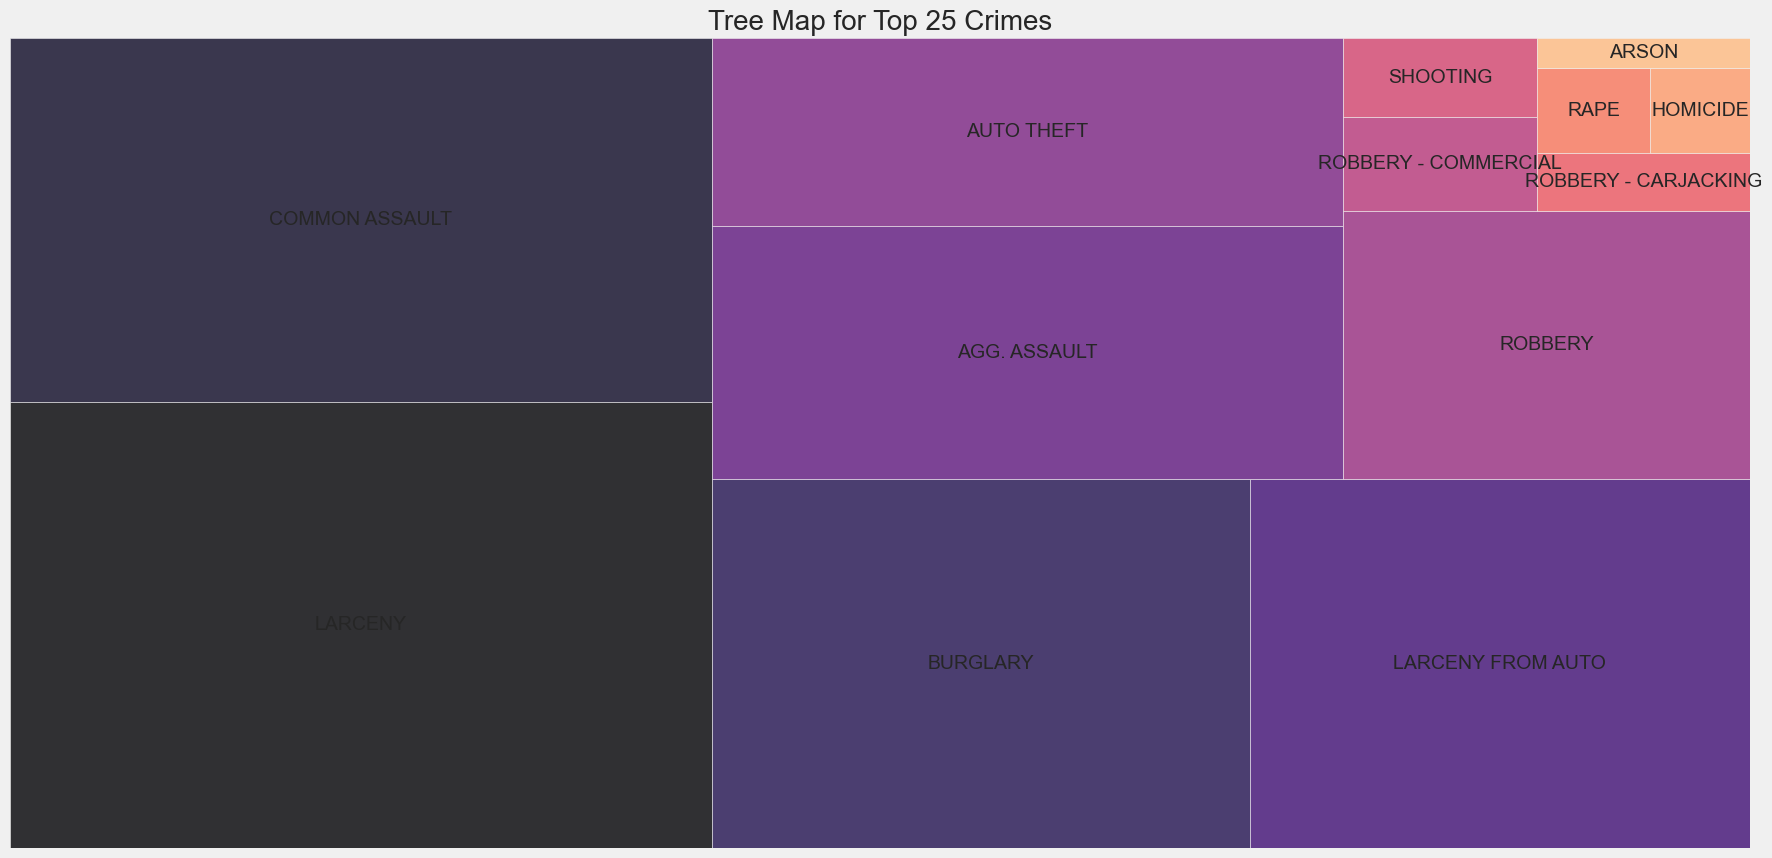

In [52]:
import squarify
data=topcrimes(create_connection('Normalized_data.db', delete_db=False))
y = data['CrimeDescription'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

In [53]:
def dis(conn):
    Sql_statement='''SELECT  C.CrimeDescription,L.District
    FROM Crime C
    Inner Join Person P on P.CrimeID=C.CrimeID
    Inner Join Location L on L.LocationID=P.LocationID
    '''
    df = pd.read_sql_query(Sql_statement, conn)
    return df

       CrimeDescription   District
0               LARCENY    CENTRAL
1              BURGLARY   NORTHERN
2               LARCENY    CENTRAL
3               LARCENY  SOUTHEAST
4          AGG. ASSAULT  NORTHWEST
...                 ...        ...
545910   COMMON ASSAULT    WESTERN
545911     AGG. ASSAULT   NORTHERN
545912       AUTO THEFT  SOUTHWEST
545913       AUTO THEFT  NORTHWEST
545914       AUTO THEFT    WESTERN

[545915 rows x 2 columns]


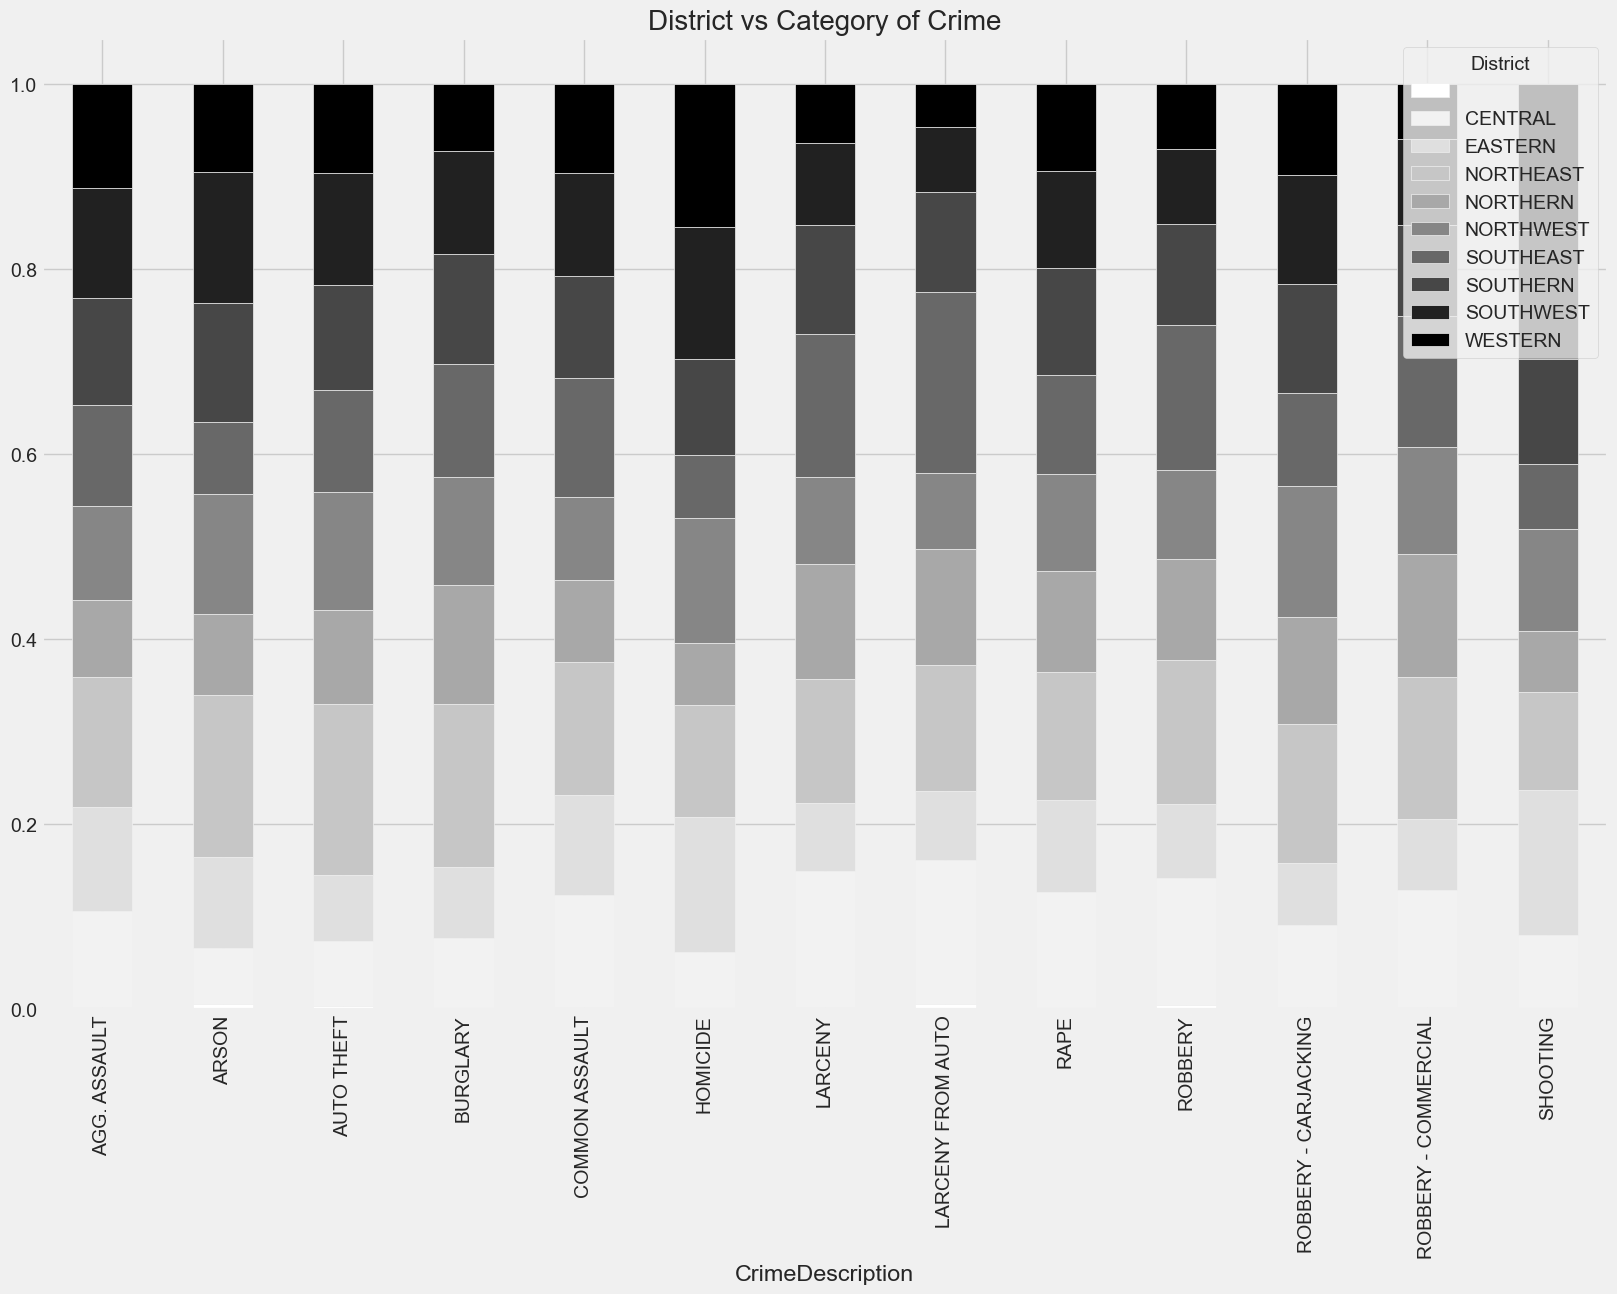

In [54]:
data=dis(create_connection('Normalized_data.db', delete_db=False))
print(data)
df = pd.crosstab(data['CrimeDescription'], data['District'])
color = plt.cm.Greys(np.linspace(0, 1, 10))

df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [55]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import folium
bl_map = folium.Map(location = [39.3121, -76.6198], zoom_start = 12)

In [57]:
def crime_map(conn):
    Sql_statement='''SELECT  L.Latitude,L.Longitude,l.Neighborhood,count(C.CrimeID) as crimes
    from Crime C
    Join Person P on P.CrimeID=C.CrimeID
    Join Location L on L.LocationID=P.LocationID
    where L.Neighborhood not in ('')
    group by L.Neighborhood
    '''
    ### END SOLUTION
    df = pd.read_sql_query(Sql_statement, conn)
    return df

In [58]:
ht=crime_map(create_connection('Normalized_data.db', delete_db=False))

In [59]:
ht

,Latitude,Longitude,Neighborhood,crimes
0,-76.6110,39.3282,ABELL,1324
1,-76.6745,39.2894,ALLENDALE,2437
2,-76.5714,39.3380,ARCADIA,609
3,-76.6841,39.3466,ARLINGTON,2374
4,-76.5472,39.3053,ARMISTEAD GARDENS,1919
...,...,...,...,...
273,-76.6072,39.3456,WRENLANE,325
274,-76.6280,39.3322,WYMAN PARK,585
275,-76.6307,39.3551,WYNDHURST,335
276,-76.6912,39.2738,YALE HEIGHTS,1381


In [60]:
import folium
for i in range(len(ht['crimes'])):
    folium.CircleMarker(
        location=[ht['Longitude'][i],ht['Latitude'][i]],
        radius=5,
        popup=ht['Neighborhood'][i],
        color='#ff0000',
        fill=True,
        fill_color='#ff0000').add_to(bl_map)

In [61]:
bl_map